<pre>
주식, 채권 비율 %
수익률 리스크 확인

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings(action='ignore')
sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
#plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
from IPython.core.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

In [3]:
sdf = pd.read_csv("./datasets/kodex_stock.csv")
bdf = pd.read_csv("./datasets/kodex_bond10y.csv")

In [4]:
sdf.shape, bdf.shape

((1845, 6), (1845, 6))

In [6]:
sdf.head()

,dt,close,high,low,open,volume
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0


In [ ]:
bdf.head()

,dt,close,high,low,open,volume
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00
2,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50
3,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50
4,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25


# 수익률 (주식 & 채권)

## 누적수익률

In [11]:
sdf['수익률_chg'] = sdf['close'].pct_change()
r = sdf['수익률_chg']
sdf['누적수익률']  =( (1+r).cumprod() - 1 ) *100
sdf['로그수익률']  = np.log( 1+r) 
sdf['누적로그수익률']  =  np.log( 1+r).cumsum() *100
sdf

,dt,close,high,low,open,volume,수익률_chg,누적수익률,로그수익률,누적로그수익률
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0,NaN,NaN,NaN,NaN
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0,0.000000,0.000000,0.000000,0.000000
2,2012-01-26,49930.0,49985.0,49925.0,49960.0,1161.0,-0.000600,-0.060048,-0.000601,-0.060066
3,2012-01-27,50000.0,57200.0,49810.0,57200.0,104.0,0.001402,0.080064,0.001401,0.080032
4,2012-01-30,50130.0,50130.0,50000.0,50000.0,1080.0,0.002600,0.340272,0.002597,0.339695
...,...,...,...,...,...,...,...,...,...,...
1840,2019-07-17,71210.0,71220.0,71070.0,71080.0,344.0,0.002181,42.534027,0.002179,35.441057
1841,2019-07-18,71665.0,71665.0,71290.0,71290.0,1516.0,0.006390,43.444756,0.006369,36.077980
1842,2019-07-19,71770.0,71850.0,71670.0,71670.0,15083.0,0.001465,43.654924,0.001464,36.224388
1843,2019-07-22,71685.0,71755.0,71685.0,71740.0,1461.0,-0.001184,43.484788,-0.001185,36.105884


In [12]:
bdf['수익률_chg'] = bdf['close'].pct_change()
r = bdf['수익률_chg']
bdf['누적수익률']  =( (1+r).cumprod() - 1 ) *100
bdf['로그수익률']  = np.log( 1+r) 
bdf['누적로그수익률']  =  np.log( 1+r).cumsum() *100
bdf

,dt,close,high,low,open,volume,수익률_chg,누적수익률,로그수익률,누적로그수익률
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.50,NaN,NaN,NaN,NaN
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.00,0.003449,0.344866,0.003443,0.344273
2,2012-01-26,23299.6,23428.5,23237.4,23428.5,2162210.50,0.000954,0.440567,0.000953,0.439599
3,2012-01-27,23335.2,23419.6,23206.3,23419.6,3456417.50,0.001528,0.594032,0.001527,0.592275
4,2012-01-30,23073.0,23308.5,23050.8,23241.9,2899746.25,-0.011236,-0.536267,-0.011300,-0.537710
...,...,...,...,...,...,...,...,...,...,...
1840,2019-07-17,27225.0,27340.0,27130.0,27310.0,1886297.00,-0.008919,17.362291,-0.008959,16.009547
1841,2019-07-18,27165.0,27260.0,27065.0,27180.0,2290347.00,-0.002204,17.103641,-0.002206,15.788918
1842,2019-07-19,27545.0,27610.0,27315.0,27315.0,2532920.00,0.013989,18.741756,0.013892,17.178083
1843,2019-07-22,27535.0,27620.0,27435.0,27470.0,1797628.00,-0.000363,18.698647,-0.000363,17.141772


## 수익률 차트

In [13]:
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

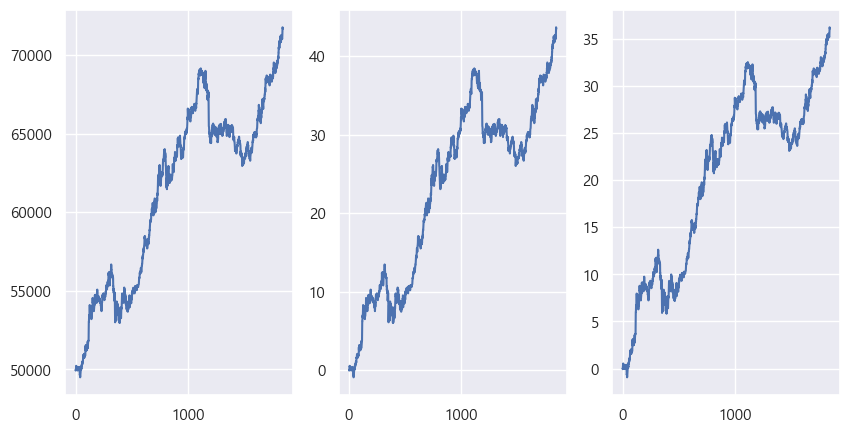

In [14]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.plot(sdf['close'])

plt.subplot(1,3,2)
# (1+r).pct_change() -1
plt.plot( sdf['누적수익률'])

plt.subplot(1,3,3)
# np.log(1 + r)
plt.plot(  sdf['누적로그수익률'] )

plt.show()

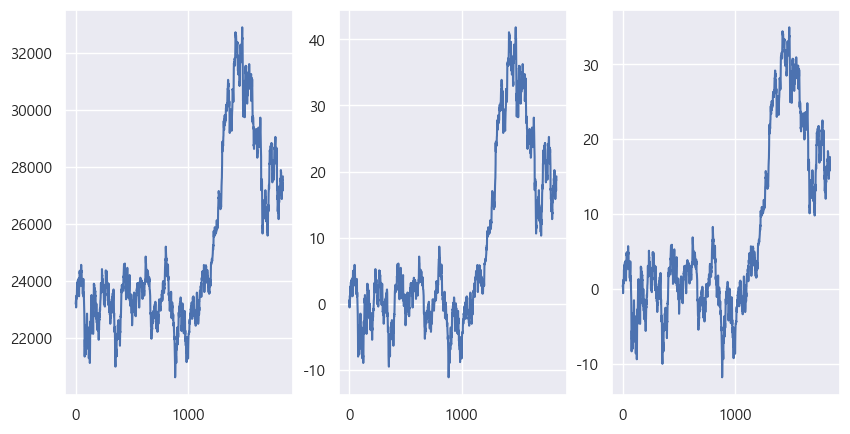

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1,3,1)
plt.plot(bdf['close'])

plt.subplot(1,3,2)
# (1+r).pct_change() -1
plt.plot( bdf['누적수익률'])

plt.subplot(1,3,3)
# np.log(1 + r)
plt.plot(  bdf['누적로그수익률'] )

plt.show()

# 포트폴리오

In [16]:
sdf = pd.read_csv("./datasets/kodex_stock.csv")
bdf = pd.read_csv("./datasets/kodex_bond10y.csv")

In [18]:
sdf.head(2)

,dt,close,high,low,open,volume
0,2012-01-20,49960.0,50040.0,49960.0,50040.0,3276.0
1,2012-01-25,49960.0,49960.0,49960.0,49960.0,100.0


In [21]:
sdf=sdf.drop(['high','low','open','volume'],axis=1)

In [22]:
sdf.rename(columns={'close':'주식종가'},inplace=True)

In [23]:
sdf.head(2)

,dt,주식종가
0,2012-01-20,49960.0
1,2012-01-25,49960.0


In [19]:
bdf.head(2)

,dt,close,high,low,open,volume
0,2012-01-20,23197.4,23264.1,22801.9,22833.0,5205309.5
1,2012-01-25,23277.4,23539.6,23161.9,23197.4,7721437.0


In [24]:
bdf=bdf.drop(['high','low','open','volume'],axis=1)

In [25]:
bdf.rename(columns={'close':'채권종가'},inplace=True)

In [26]:
bdf.head(2)

,dt,채권종가
0,2012-01-20,23197.4
1,2012-01-25,23277.4


In [28]:
bdf.drop('dt',axis=1,inplace=True)

In [31]:
pdf=pd.concat([sdf,bdf],axis=1)

In [32]:
pdf.head()

,dt,주식종가,채권종가
0,2012-01-20,49960.0,23197.4
1,2012-01-25,49960.0,23277.4
2,2012-01-26,49930.0,23299.6
3,2012-01-27,50000.0,23335.2
4,2012-01-30,50130.0,23073.0


In [33]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dt      1845 non-null   object 
 1   주식종가    1845 non-null   float64
 2   채권종가    1845 non-null   float64
dtypes: float64(2), object(1)
memory usage: 43.4+ KB


In [34]:
pdf=pdf.set_index('dt')

In [35]:
pdf.head(2)

,주식종가,채권종가
dt,,
2012-01-20,49960.0,23197.4
2012-01-25,49960.0,23277.4


## 기대수익률

In [95]:
ret_df = np.log(1+ pdf.pct_change())
ret_df.dropna(inplace=True, axis=0)
ret_df[:5]

,주식종가,채권종가
dt,,
2012-01-25,0.000000,0.003443
2012-01-26,-0.000601,0.000953
2012-01-27,0.001401,0.001527
2012-01-30,0.002597,-0.011300
2012-01-31,0.000997,0.005377


In [96]:
ret_df.describe()

,주식종가,채권종가
count,1844.000000,1844.000000
mean,0.000196,0.000096
std,0.002763,0.008127
min,-0.015355,-0.042208
25%,-0.001239,-0.003876
50%,0.000146,0.000391
75%,0.001690,0.004556
max,0.017788,0.037162


## 일별 기대 수익률

In [38]:
ret_df.mean()

주식종가    0.000196
채권종가    0.000096
dtype: float64

## 년간 기대 수익률

In [39]:
(ret_df.mean() * 252) * 100

주식종가    4.932303
채권종가    2.409423
dtype: float64

* 자산별 년간 기대 수익률

In [40]:
er = (ret_df.mean() * 252).values
er

array([0.04932303, 0.02409423])

## 자산별 가중치

In [80]:
# w = [0.6, 0.4]
w = [0.9, 0.1]

## 포트폴리오 가중치 적용

In [81]:
portpolio_er = np.dot(er, w)
portpolio_er

0.04680015169756871

## 자산별 위험 추정 (리스크)

### 일간변동성 / 년간 변동성 (std)

In [97]:
print(ret_df.std()) 
print((ret_df.std() * np.sqrt(252))  * 100)

주식종가    0.002763
채권종가    0.008127
dtype: float64
주식종가     4.385422
채권종가    12.901711
dtype: float64


### 일간변동성 / 년간 변동성 (cov)

In [83]:
cov_df = ret_df.cov()
cov_df

,주식종가,채권종가
주식종가,0.000008,-0.000003
채권종가,-0.000003,0.000066


In [84]:
C = (ret_df.cov() * 252).values
C

array([[ 0.00192319, -0.00068849],
       [-0.00068849,  0.01664541]])

In [89]:
# w = np.array([0.6, 0.4])
w = np.array([0.9, 0.1])
w

array([0.9, 0.1])

## 포트폴리오 최종 RISK

In [90]:
portfolio_var = np.dot( np.dot(w, C) , w.T) 
portfolio_std = np.sqrt(portfolio_var)
portfolio_std

0.04000389745308993

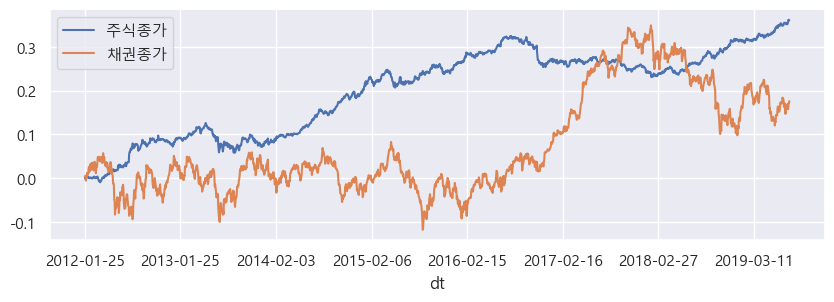

In [91]:
ret_df.cumsum().plot(figsize=(10,3))
plt.legend()
plt.show()

# 효율적 투자 전략

In [92]:
# 샤프치수   최대 포트
sharp_max = df[df['Sharp'] == df['Sharp'].max()]['Sharp'].values[0]

# 위험리스크 최소 포트
risk_min  = df[df['Risk'] == df['Risk'].min()] ['Risk'].values[0]
# 수익률     최대 포트
return_max = df[df['Return'] == df['Return'].max()] ['Return'].values[0]


#           Risk    Return
# 6274  0.223144  0.760134
#            Risk    Return
# 12088  0.173086  0.283057
#           Risk    Return
# 1667  0.306557  0.982149

print(f'Expected annual return: {return_max:.4f}')
print(f'Annual volatility: {risk_min:.4f}')
print(f'Sharpe Ratio: {sharp_max:.4f}')

Expected annual return: 0.0493
Annual volatility: 0.0398
Sharpe Ratio: 1.1710


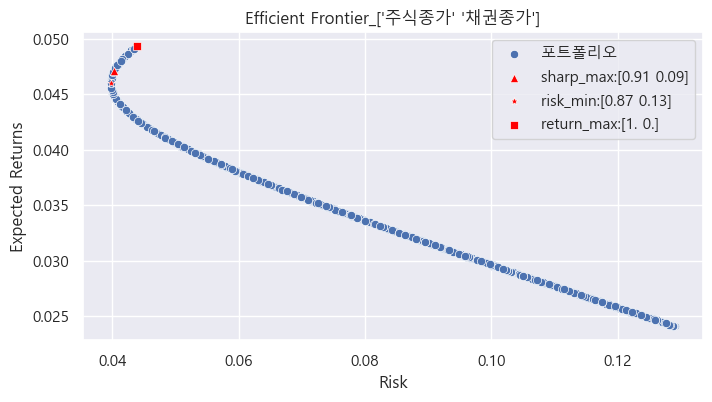

In [93]:
# 샤프치수   최대 포트
sharp_max = df[df['Sharp'] == df['Sharp'].max()]
# 위험리스크 최소 포트
risk_min  = df[df['Risk'] == df['Risk'].min()] 
# 수익률     최대 포트
return_max = df[df['Return'] == df['Return'].max()] 

plt.figure(figsize=(8,4))
sns.scatterplot(data=df        , x='Risk', y='Return'                     , label=f"포트폴리오")
sns.scatterplot(data=sharp_max , x='Risk', y='Return', marker="^", c='red', label=f"sharp_max:{sharp_max['Weight'].values[0]}")
sns.scatterplot(data=risk_min  , x='Risk', y='Return', marker="*", c='red', label=f"risk_min:{risk_min['Weight'].values[0]}")
sns.scatterplot(data=return_max, x='Risk', y='Return', marker="s", c='red', label=f"return_max:{return_max['Weight'].values[0]}")

plt.title(f'Efficient Frontier_{stocks.values}') 
plt.xlabel('Risk') 
plt.ylabel('Expected Returns') 
plt.show() 